# Exploring IPL Data from year 2008 to 2020

## Level 0 Tasks: Understanding Data

## Importing the necessary libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import matplotlib as mat
from tabulate import tabulate
import mysql.connector as sql
from sqlalchemy import create_engine

### Reading the file

In [2]:
df=pd.read_csv('C://Users/user/IPL Matches 2008-2020.csv')
df1=pd.read_csv('C://Users/user/IPL Ball-by-Ball 2008-2020.csv')

In [3]:
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,4/18/2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,4/19/2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,4/19/2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,4/20/2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,4/20/2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
df.tail()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
811,1216547,Dubai,9/28/2020,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,11/5/2020,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,11/6/2020,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,11/8/2020,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
815,1237181,Dubai,11/10/2020,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


In [5]:
df.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             816 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [7]:
df.isnull().sum()

id                   0
city                 0
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [8]:
df1.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [9]:
df1.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [10]:
df1.shape

(193468, 18)

In [11]:
df1.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [12]:
df.venue.value_counts()

Eden Gardens                                            77
Feroz Shah Kotla                                        74
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   65
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk                         57
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Punjab Cricket Association IS Bindra Stadium, Mohali    21
Maharashtra Cricket Association Stadium                 21
Sharjah Cricket Stadium                                 18
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
M.Chinnaswamy Stadium                                   15
Kingsmead                                               

In [13]:
df['team1'] = df['team1'].replace(to_replace=['Deccan Chargers','Rising Pune Supergiants','Delhi Daredevils'],value=['Sunrisers Hyderabad','Rising Pune Supergiant','Delhi Capitals'])

In [14]:
df['team2'] = df['team2'].replace(to_replace=['Deccan Chargers','Rising Pune Supergiants','Delhi Daredevils'],value=['Sunrisers Hyderabad','Rising Pune Supergiant','Delhi Capitals'])

In [15]:
df['venue']=df['venue'].replace(to_replace=['Bangalore'],value=['Bengaluru'])

### Separating Categorical and Numerical Variables

In [16]:
def seperate_data_types(df):
    Categorical=[]
    Continous=[]
    
    for column in df.columns:   #looping on the number of columns
        if df[column].dtype=='object': #nunique returns the unique values in the column.100 is the hyper parameter and can be changed            
            Categorical.append(column)
        else:
            Continous.append(column)
    return Categorical,Continous

Categorical,Continous=seperate_data_types(df)   #calling the function

#Tabulate is a package used to display list,dictionary or any other data types in tabular format
from tabulate import tabulate
table=[Categorical,Continous]
print(tabulate ({"Categorical":Categorical,"Continous":Continous},headers=['Categorical','Continous']))

Categorical      Continous
---------------  -------------
city             id
date             neutral_venue
player_of_match  result_margin
venue
team1
team2
toss_winner
toss_decision
winner
result
eliminator
method
umpire1
umpire2


In [17]:
def seperate_data_types(df1):
    Categorical=[]
    Continous=[]
    
    for column in df1.columns:   #looping on the number of columns
        if df1[column].dtype=='object': 
            Categorical.append(column)
        else:
            Continous.append(column)
    return Categorical,Continous

Categorical,Continous=seperate_data_types(df1)   #calling the function

#Tabulate is a package used to display list,dictionary or any other data types in tabular format
from tabulate import tabulate
table=[Categorical,Continous]
print(tabulate ({"Categorical":Categorical,"Continous":Continous},headers=['Categorical','Continous']))

Categorical       Continous
----------------  ------------
batsman           id
non_striker       inning
bowler            over
dismissal_kind    ball
player_dismissed  batsman_runs
fielder           extra_runs
extras_type       total_runs
batting_team      non_boundary
bowling_team      is_wicket


In [18]:
df1.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [19]:
def info_of_cat(col):
    print(f" unique values in {col} are:{df[col].unique()}")
    print(f" Mode of {col} is:{df[col].mode()[0]}")
    print(f" Total missing values in {col} is:{df[col].isnull().sum()}")

In [20]:
info_of_cat('result_margin')

 unique values in result_margin are:[140.  33.   9.   5.   6.   3.  66.   7.  10.   4.  13.  45.   8.  29.
  18.  23.  41.  12.  65.  25.   1.  14. 105.  19.  75.  92.  11.  24.
  nan  27.  38.  78.  16.  53.   2.  31.  55.  98.  34.  36.  39.  17.
  40.  67.  63.  37.  57.  35.  22.  21.  48.  26.  20.  85.  32.  76.
 111.  82.  43.  58.  28.  74.  42.  59.  46.  47.  86.  44.  87. 130.
  15.  60.  77.  30.  50.  93.  72.  62.  97. 138.  71. 144.  80.  51.
  61. 146.  64. 102. 118.  49.  88.  69.]
 Mode of result_margin is:6.0
 Total missing values in result_margin is:17


In [21]:
df['result_margin']=df['result_margin'].fillna(6.0)

In [22]:
info_of_cat('result_margin')

 unique values in result_margin are:[140.  33.   9.   5.   6.   3.  66.   7.  10.   4.  13.  45.   8.  29.
  18.  23.  41.  12.  65.  25.   1.  14. 105.  19.  75.  92.  11.  24.
  27.  38.  78.  16.  53.   2.  31.  55.  98.  34.  36.  39.  17.  40.
  67.  63.  37.  57.  35.  22.  21.  48.  26.  20.  85.  32.  76. 111.
  82.  43.  58.  28.  74.  42.  59.  46.  47.  86.  44.  87. 130.  15.
  60.  77.  30.  50.  93.  72.  62.  97. 138.  71. 144.  80.  51.  61.
 146.  64. 102. 118.  49.  88.  69.]
 Mode of result_margin is:6.0
 Total missing values in result_margin is:0


In [23]:
def info_of_cat(col):
    print(f" unique values in {col} are:{df1[col].unique()}")
    print(f" Mode of {col} is:{df1[col].mode()[0]}")
    print(f" Total missing values in {col} is:{df1[col].isnull().sum()}")

In [24]:
info_of_cat('bowling_team')

 unique values in bowling_team are:['Royal Challengers Bangalore' 'Kolkata Knight Riders'
 'Chennai Super Kings' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' nan 'Sunrisers Hyderabad'
 'Rising Pune Supergiants' 'Gujarat Lions' 'Rising Pune Supergiant'
 'Delhi Capitals']
 Mode of bowling_team is:Mumbai Indians
 Total missing values in bowling_team is:191


In [25]:
df1['bowling_team']=df1['bowling_team'].fillna('Mumbai Indians')

In [26]:
db=sql.connect(host='localhost',username='root',password='Akshit15')

In [27]:
cursor=db.cursor()

In [28]:
cursor.execute('Create database if not Exists ipl')

In [29]:
hostname="localhost"
dbname="ipl" # Name of the database into which we want into insert the data 
uname="root"
pwd="Akshit15"


# Create SQLAlchemy engine to connect to MySQL Database

engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
.format(host=hostname, db=dbname, user=uname, pw=pwd))

In [30]:
df.to_sql('match_summary',engine,index=False)

ValueError: Table 'match_summary' already exists.

In [ ]:
df1.to_sql('match_details',engine,index=False)

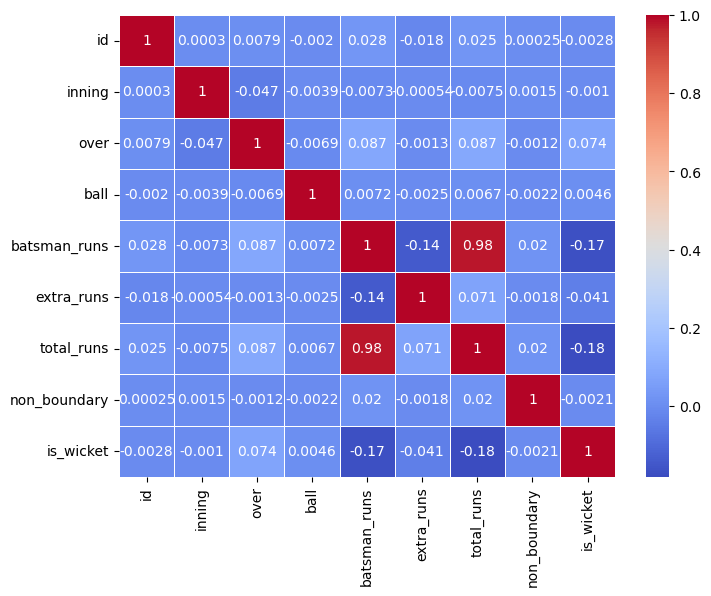

In [31]:
fig, ax=plt.subplots(figsize=(8,6))
sb.heatmap(df1.corr(), annot=True, cbar=0.5, linewidth=0.5, cmap="coolwarm")
plt.show()

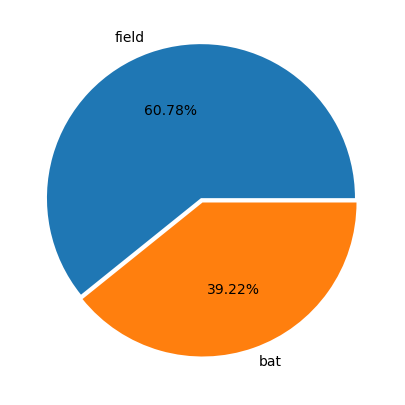

In [32]:
fig,ax=plt.subplots(figsize=(10,5))
data=df['toss_decision'].value_counts()
lbl=data.keys()
plt.pie(data,labels=lbl,autopct='%0.2f%%',explode=[0.03,0.0])
plt.show()

### Most of the team have chosen field first after winning the toss

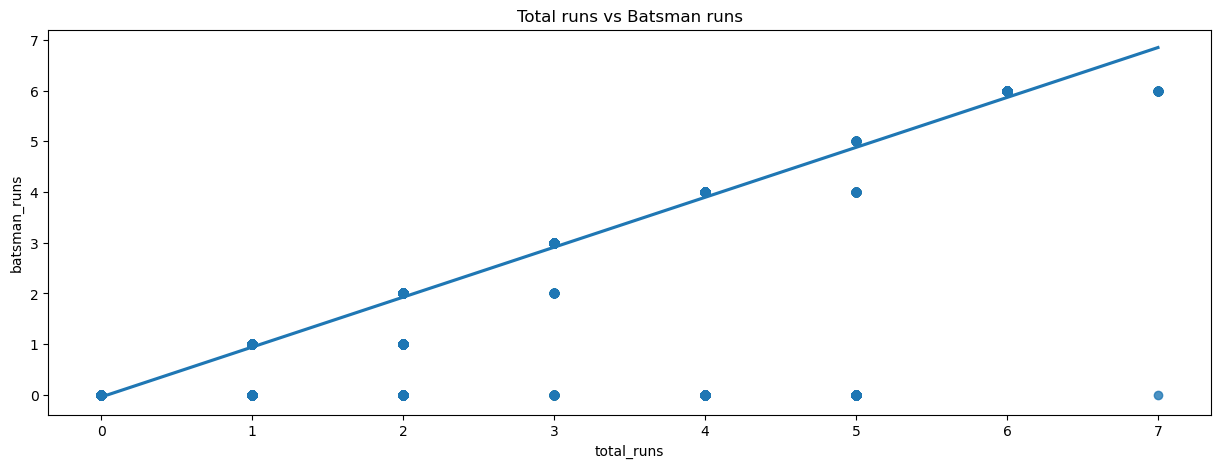

In [33]:
fig,ax=plt.subplots(figsize=(15,5))
ax.set_title('Total runs vs Batsman runs')
sb.regplot(x=df1['total_runs'],y=df1['batsman_runs'])
plt.show()

In [ ]:
win=df['winner'].value_counts()
win

In [ ]:
plt.figure(figsize=(10,5))
sb.barplot(y=win.index, x=win.values)
plt.show()


### Mumbai Indians have won maximum number of matches

In [ ]:
df['method'].value_counts()

### So, in 19 matches D/L method was used to decide the winner due to varied reasons.

In [ ]:
u1=df['umpire1'].value_counts().head(5)
u1

In [ ]:
u2=df['umpire2'].value_counts().head(5)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].set_title('Top 5 umpire 1')
ax[1].set_title('Top 5 umpire 2')
sb.barplot(y=u1.index, x=u1.values, ax=ax[0])
sb.barplot(y=u2.index, x=u2.values, ax=ax[1])
plt.show()


### HDPK Dharmasena and S.Ravi are the favourite umpires who appears in maximum matches